In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("Global Weather Repository .csv")
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.0,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.1,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.0,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.3,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.0,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [3]:
df.isnull().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,107573.000000,107573.000000,1.075730e+05,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000,107573.000000
mean,19.168648,22.046254,1.739792e+09,22.539398,72.572686,8.149235,13.118378,170.668281,1014.037667,29.943867,0.140541,0.005338,64.873416,39.483495,23.565873,74.412140,9.617957,5.690638,3.722160,11.404478,18.355815,499.404069,61.236677,15.593554,10.948627,25.286413,51.290666,1.731336,2.687087,49.844292
std,24.443779,65.803416,1.381541e+07,8.880167,15.984118,7.650346,12.309373,102.745044,11.021829,0.325429,0.593443,0.023449,24.162192,33.829183,10.610525,19.097189,2.539380,1.580844,3.603566,8.912220,14.342839,819.018505,31.774609,25.353276,39.088080,39.452629,158.451561,0.965388,2.515323,35.079434
min,-41.300000,-175.200000,1.715849e+09,-24.900000,-12.800000,2.200000,3.600000,1.000000,947.000000,27.960000,0.000000,0.000000,2.000000,0.000000,-35.600000,-32.100000,0.000000,0.000000,0.000000,2.200000,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.168000,-1848.150000,1.000000,1.000000,0.000000
25%,3.750000,-6.836100,1.727861e+09,17.400000,63.300000,4.000000,6.500000,83.000000,1010.000000,29.830000,0.000000,0.000000,48.000000,0.000000,17.400000,63.300000,10.000000,6.000000,0.400000,6.400000,10.400000,225.700000,41.000000,1.480000,0.925000,7.215000,10.371000,1.000000,1.000000,15.000000
50%,17.250000,23.316700,1.739787e+09,24.400000,75.900000,6.900000,11.200000,164.000000,1013.000000,29.930000,0.000000,0.000000,70.000000,27.000000,25.800000,78.400000,10.000000,6.000000,2.700000,9.800000,15.700000,317.100000,58.000000,5.180000,2.405000,14.615000,21.090000,1.000000,2.000000,50.000000
75%,40.400000,50.580000,1.751794e+09,28.200000,82.800000,11.200000,18.000000,256.000000,1018.000000,30.060000,0.030000,0.000000,84.000000,75.000000,30.500000,87.000000,10.000000,6.000000,6.300000,15.100000,24.200000,493.950000,78.000000,17.945000,8.880000,28.675000,43.660000,2.000000,3.000000,85.000000
max,64.150000,179.220000,1.763623e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,3006.000000,88.770000,42.240000,1.660000,100.000000,100.000000,51.200000,124.200000,32.000000,19.000000,16.300000,1845.700000,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,6037.290000,6.000000,10.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107573 entries, 0 to 107572
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   country                       107573 non-null  object 
 1   location_name                 107573 non-null  object 
 2   latitude                      107573 non-null  float64
 3   longitude                     107573 non-null  float64
 4   timezone                      107573 non-null  object 
 5   last_updated_epoch            107573 non-null  int64  
 6   last_updated                  107573 non-null  object 
 7   temperature_celsius           107573 non-null  float64
 8   temperature_fahrenheit        107573 non-null  float64
 9   condition_text                107573 non-null  object 
 10  wind_mph                      107573 non-null  float64
 11  wind_kph                      107573 non-null  float64
 12  wind_degree                   107573 non-nul

In [7]:
from scipy.stats import zscore
num_cols = df.select_dtypes(include=['float64','int64']).columns
df = df[(np.abs(zscore(df[num_cols])) < 3).all(axis=1)]
df

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.00,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.00,103.0,1.10,0.20,8.40,26.60,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.10,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.60,97.3,0.90,0.10,1.10,2.00,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.00,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.70,12.2,65.10,13.40,10.40,18.40,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.30,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.20,64.4,1.60,0.20,0.70,0.90,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
5,Antigua and Barbuda,Saint John's,17.1200,-61.8500,America/Antigua,1715849100,2024-05-16 04:45,26.0,78.8,Partly cloudy,5.6,9.0,90,E,1013.0,29.91,0.02,0.00,84,25,28.2,82.8,10.0,6.0,1.0,15.7,25.3,220.30,29.0,0.20,0.20,1.20,4.50,1,1,05:36 AM,06:32 PM,01:05 PM,01:14 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107568,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1763622900,2025-11-20 03:15,24.2,75.6,Partly cloudy,2.7,4.3,154,SSE,1011.0,29.85,0.00,0.00,94,37,26.9,80.4,2.0,1.0,0.0,5.6,9.1,1343.85,32.0,10.95,3.05,6.95,7.15,1,1,06:25 AM,06:02 PM,06:36 AM,06:17 PM,New Moon,0
107569,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1763622900,2025-11-20 14:15,23.2,73.8,Partly Cloudy,9.2,14.8,16,NNE,1023.0,30.21,0.00,0.00,38,0,24.6,76.3,10.0,6.0,4.5,10.6,17.1,783.85,19.0,32.15,31.55,43.15,43.85,3,5,06:10 AM,05:14 PM,06:01 AM,05:02 PM,New Moon,0
107570,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1763622900,2025-11-20 10:15,13.5,56.3,Sunny,6.7,10.8,57,ENE,1023.0,30.20,0.00,0.00,38,3,12.7,54.9,10.0,6.0,6.3,7.7,12.4,164.85,84.0,1.95,8.05,22.65,36.15,2,2,06:08 AM,05:30 PM,06:05 AM,05:29 PM,New Moon,0
107571,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1763622900,2025-11-20 09:15,16.8,62.2,Light rain shower,8.5,13.7,117,ESE,1016.0,29.99,0.66,0.03,95,100,16.8,62.2,10.0,6.0,0.4,12.7,20.4,173.85,48.0,1.85,1.35,2.85,2.95,1,1,05:26 AM,06:19 PM,05:13 AM,06:36 PM,New Moon,0


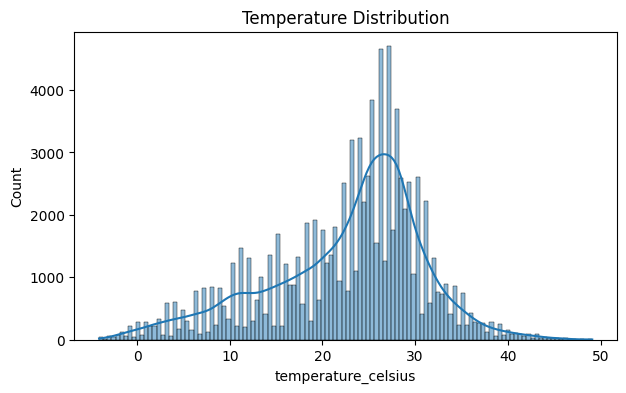

In [8]:
plt.figure(figsize=(7,4))
sns.histplot(df['temperature_celsius'], kde=True)
plt.title("Temperature Distribution")
plt.show()

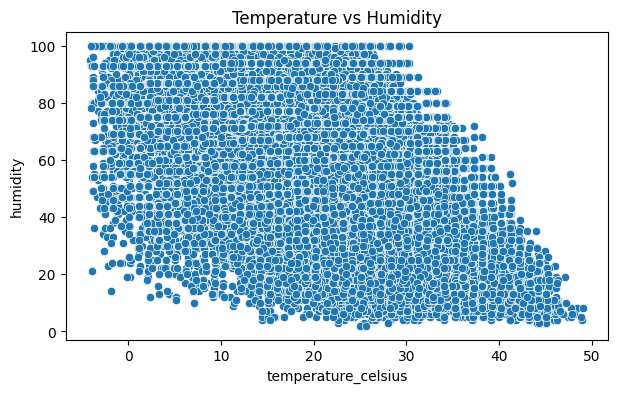

In [9]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x='temperature_celsius', y='humidity')
plt.title("Temperature vs Humidity")
plt.show()

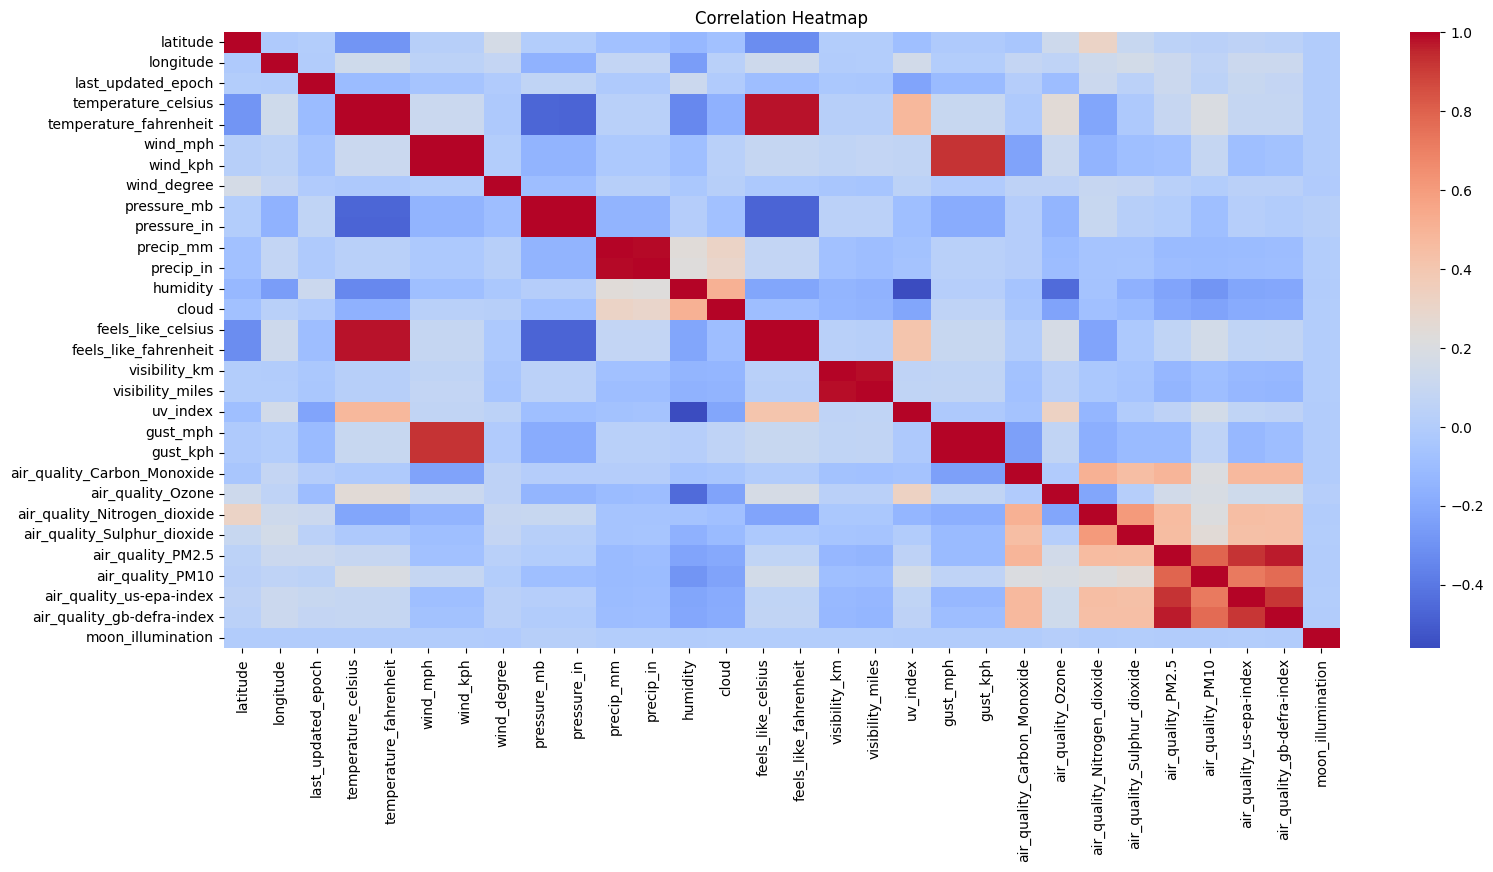

In [10]:
plt.figure(figsize=(18,8))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [11]:
features = [
    'humidity', 'wind_kph', 'pressure_mb', 
    'air_quality_PM2.5', 'air_quality_PM10',
    'air_quality_us-epa-index'
]

X = df[features]
y = df['temperature_celsius']
X

,humidity,wind_kph,pressure_mb,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index
0,24,13.3,1012.0,8.40,26.60,1
1,94,11.2,1012.0,1.10,2.00,1
2,29,15.1,1011.0,10.40,18.40,1
3,61,11.9,1007.0,0.70,0.90,1
5,84,9.0,1013.0,1.20,4.50,1
...,...,...,...,...,...,...
107568,94,4.3,1011.0,6.95,7.15,1
107569,38,14.8,1023.0,43.15,43.85,3
107570,38,10.8,1023.0,22.65,36.15,2
107571,95,13.7,1016.0,2.85,2.95,1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[0.82653061, 0.28663793, 0.47692308, 0.09442276, 0.03524248,
        0.        ],
       [0.65306122, 0.09267241, 0.47692308, 0.39929612, 0.26622093,
        0.66666667],
       [0.92857143, 0.        , 0.35384615, 0.31791044, 0.12784512,
        0.66666667],
       ...,
       [0.71428571, 0.0862069 , 0.4       , 0.01949625, 0.00531387,
        0.        ],
       [0.83673469, 0.48060345, 0.41538462, 0.02326702, 0.02899031,
        0.        ],
       [0.31632653, 0.14655172, 0.56923077, 0.00511148, 0.00177383,
        0.        ]], shape=(77010, 6))

In [14]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

In [15]:
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2_scor = r2_score(y_test, pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("r2_scor:", r2_scor)

MAE: 5.352761812556237
RMSE: 6.802061654547731
r2_scor: 0.34152011131062254


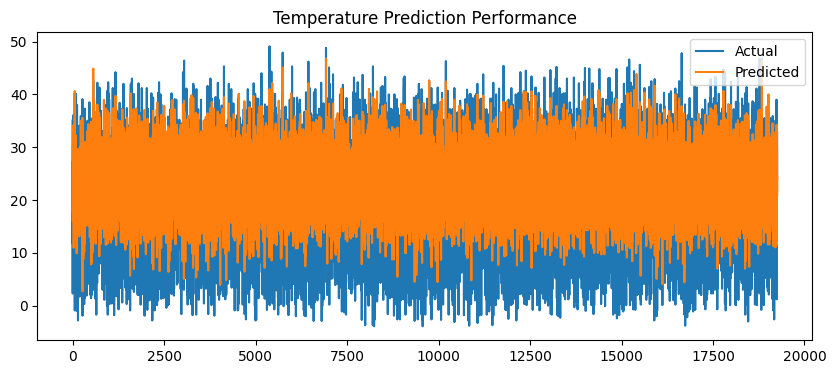

In [16]:
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label="Actual")
plt.plot(pred, label="Predicted")
plt.legend()
plt.title("Temperature Prediction Performance")
plt.show()

In [21]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

In [22]:
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2_scor = r2_score(y_test, pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("r2_scor:", r2_scor)

MAE: 3.782151776532044
RMSE: 5.338724154625517
r2_scor: 0.5943641311895251


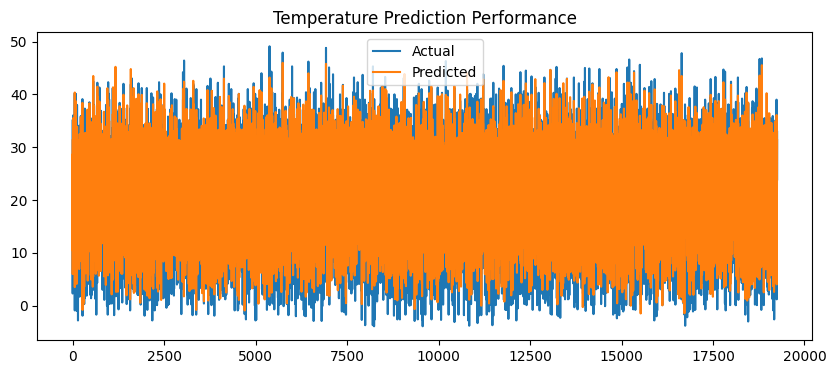

In [23]:
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label="Actual")
plt.plot(pred, label="Predicted")
plt.legend()
plt.title("Temperature Prediction Performance")
plt.show()